# Dimensionality Reduction

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

from collections import Counter

# dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

/Users/nicolasgalvarinoguerravaras/anaconda3/envs/ml_dl/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicolasgalvarinoguerravaras/anaconda3/envs/ml_dl/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicolasgalvarinoguerr

In [2]:
exop = pd.read_csv('../Naive_Bayes_Tutorial/exoplanet_data_processed.csv')
exop

mass       omega         tperi         tconj      tzero_tr   
0      5.704875   94.800000  2.452900e+06  2.452829e+06  2.466684e+06  \
1      5.704875  117.630000  2.452861e+06  2.452829e+06  2.466684e+06   
2      5.704875  168.622899  2.452861e+06  2.452829e+06  2.466684e+06   
3      9.653000   22.780000  2.451373e+06  2.452829e+06  2.466684e+06   
4      6.900000   15.200000  9.100000e+03  2.452829e+06  2.466684e+06   
...         ...         ...           ...           ...           ...   
5248   0.620000   44.519000  2.450034e+06  2.452829e+06  2.466684e+06   
5249   9.100000  247.629000  2.449923e+06  2.452829e+06  2.466684e+06   
5250  23.580000  252.991000  2.450059e+06  2.452829e+06  2.466684e+06   
5251   5.704875    7.300000  2.124186e+06  2.452829e+06  2.466684e+06   
5252   5.704875  131.000000  2.455280e+06  2.452829e+06  2.466684e+06   

               k  temp_calculated  temp_measured  geometric_albedo     log_g   
0     302.800000      1006.863821       1588.525          0.236867  4.255023  \
1     189.700000      1006.863821       1588.525          0.236867  4.255023   
2     100.000000      1006.863821       1588.525          0.236867  4.255023   
3      90.000000      1006.863821       1588.525          0.236867  4.255023   
4     254.723221      1006.863821       1588.525          0.236867  4.255023   
...          ...              ...            ...               ...       ...   
5248   70.519000      1006.863821       1588.525          0.236867  4.255023   
5249   53.498000      1006.863821       1588.525          0.236867  4.255023   
5250   67.700000      1006.863821       1588.525          0.236867  4.255023   
5251  254.723221      1006.863821       1588.525          0.236867  4.255023   
5252   11.700000      1006.863821       1588.525          0.236867  4.255023   

      ...     mag_j      mag_h      mag_k  star_distance  star_metallicity   
0     ...  12.63728  12.248203  12.450653     110.600000          -0.35000  \
1     ...  12.63728  12.248203  12.450653     119.500000           0.04000   
2     ...   3.02000   2.610000   2.330000      76.400000          -0.24000   
3     ...  12.63728  12.248203  12.450653      18.100000           0.43000   
4     ...  12.63728  12.248203  12.450653      18.100000           0.43000   
...   ...       ...        ...        ...            ...               ...   
5248  ...  12.63728  12.248203  12.450653      13.470000           0.09000   
5249  ...  12.63728  12.248203  12.450653      13.470000           0.09000   
5250  ...  12.63728  12.248203  12.450653      13.470000           0.09000   
5251  ...  12.63728  12.248203  12.450653      13.470000           0.09000   
5252  ...  12.63728  12.248203  12.450653     702.523299          -0.00496   

      star_mass  star_radius  star_age    star_teff          label  
0      2.700000    19.000000  4.253231  4742.000000  non-habitable  
1      1.800000    24.080000  1.560000  4340.000000  non-habitable  
2      2.200000    11.000000  4.253231  4813.000000  non-habitable  
3      0.900000     0.708000  5.100000  5311.000000  non-habitable  
4      0.900000     0.708000  5.100000  5311.000000  non-habitable  
...         ...          ...       ...          ...            ...  
5248   1.270000     1.631000  3.800000  6212.000000  non-habitable  
5249   1.270000     1.631000  3.800000  6212.000000  non-habitable  
5250   1.270000     1.631000  3.800000  6212.000000      habitable  
5251   1.270000     1.631000  3.800000  6212.000000  non-habitable  
5252   0.943699     1.547046  4.253231  5344.358415  non-habitable  

[5253 rows x 21 columns]

In [3]:
lb = LabelBinarizer()
exop['label_bin'] = lb.fit_transform(exop['label'])
exop

mass       omega         tperi         tconj      tzero_tr   
0      5.704875   94.800000  2.452900e+06  2.452829e+06  2.466684e+06  \
1      5.704875  117.630000  2.452861e+06  2.452829e+06  2.466684e+06   
2      5.704875  168.622899  2.452861e+06  2.452829e+06  2.466684e+06   
3      9.653000   22.780000  2.451373e+06  2.452829e+06  2.466684e+06   
4      6.900000   15.200000  9.100000e+03  2.452829e+06  2.466684e+06   
...         ...         ...           ...           ...           ...   
5248   0.620000   44.519000  2.450034e+06  2.452829e+06  2.466684e+06   
5249   9.100000  247.629000  2.449923e+06  2.452829e+06  2.466684e+06   
5250  23.580000  252.991000  2.450059e+06  2.452829e+06  2.466684e+06   
5251   5.704875    7.300000  2.124186e+06  2.452829e+06  2.466684e+06   
5252   5.704875  131.000000  2.455280e+06  2.452829e+06  2.466684e+06   

               k  temp_calculated  temp_measured  geometric_albedo     log_g   
0     302.800000      1006.863821       1588.525          0.236867  4.255023  \
1     189.700000      1006.863821       1588.525          0.236867  4.255023   
2     100.000000      1006.863821       1588.525          0.236867  4.255023   
3      90.000000      1006.863821       1588.525          0.236867  4.255023   
4     254.723221      1006.863821       1588.525          0.236867  4.255023   
...          ...              ...            ...               ...       ...   
5248   70.519000      1006.863821       1588.525          0.236867  4.255023   
5249   53.498000      1006.863821       1588.525          0.236867  4.255023   
5250   67.700000      1006.863821       1588.525          0.236867  4.255023   
5251  254.723221      1006.863821       1588.525          0.236867  4.255023   
5252   11.700000      1006.863821       1588.525          0.236867  4.255023   

      ...      mag_h      mag_k  star_distance  star_metallicity  star_mass   
0     ...  12.248203  12.450653     110.600000          -0.35000   2.700000  \
1     ...  12.248203  12.450653     119.500000           0.04000   1.800000   
2     ...   2.610000   2.330000      76.400000          -0.24000   2.200000   
3     ...  12.248203  12.450653      18.100000           0.43000   0.900000   
4     ...  12.248203  12.450653      18.100000           0.43000   0.900000   
...   ...        ...        ...            ...               ...        ...   
5248  ...  12.248203  12.450653      13.470000           0.09000   1.270000   
5249  ...  12.248203  12.450653      13.470000           0.09000   1.270000   
5250  ...  12.248203  12.450653      13.470000           0.09000   1.270000   
5251  ...  12.248203  12.450653      13.470000           0.09000   1.270000   
5252  ...  12.248203  12.450653     702.523299          -0.00496   0.943699   

      star_radius  star_age    star_teff          label  label_bin  
0       19.000000  4.253231  4742.000000  non-habitable          1  
1       24.080000  1.560000  4340.000000  non-habitable          1  
2       11.000000  4.253231  4813.000000  non-habitable          1  
3        0.708000  5.100000  5311.000000  non-habitable          1  
4        0.708000  5.100000  5311.000000  non-habitable          1  
...           ...       ...          ...            ...        ...  
5248     1.631000  3.800000  6212.000000  non-habitable          1  
5249     1.631000  3.800000  6212.000000  non-habitable          1  
5250     1.631000  3.800000  6212.000000      habitable          0  
5251     1.631000  3.800000  6212.000000  non-habitable          1  
5252     1.547046  4.253231  5344.358415  non-habitable          1  

[5253 rows x 22 columns]

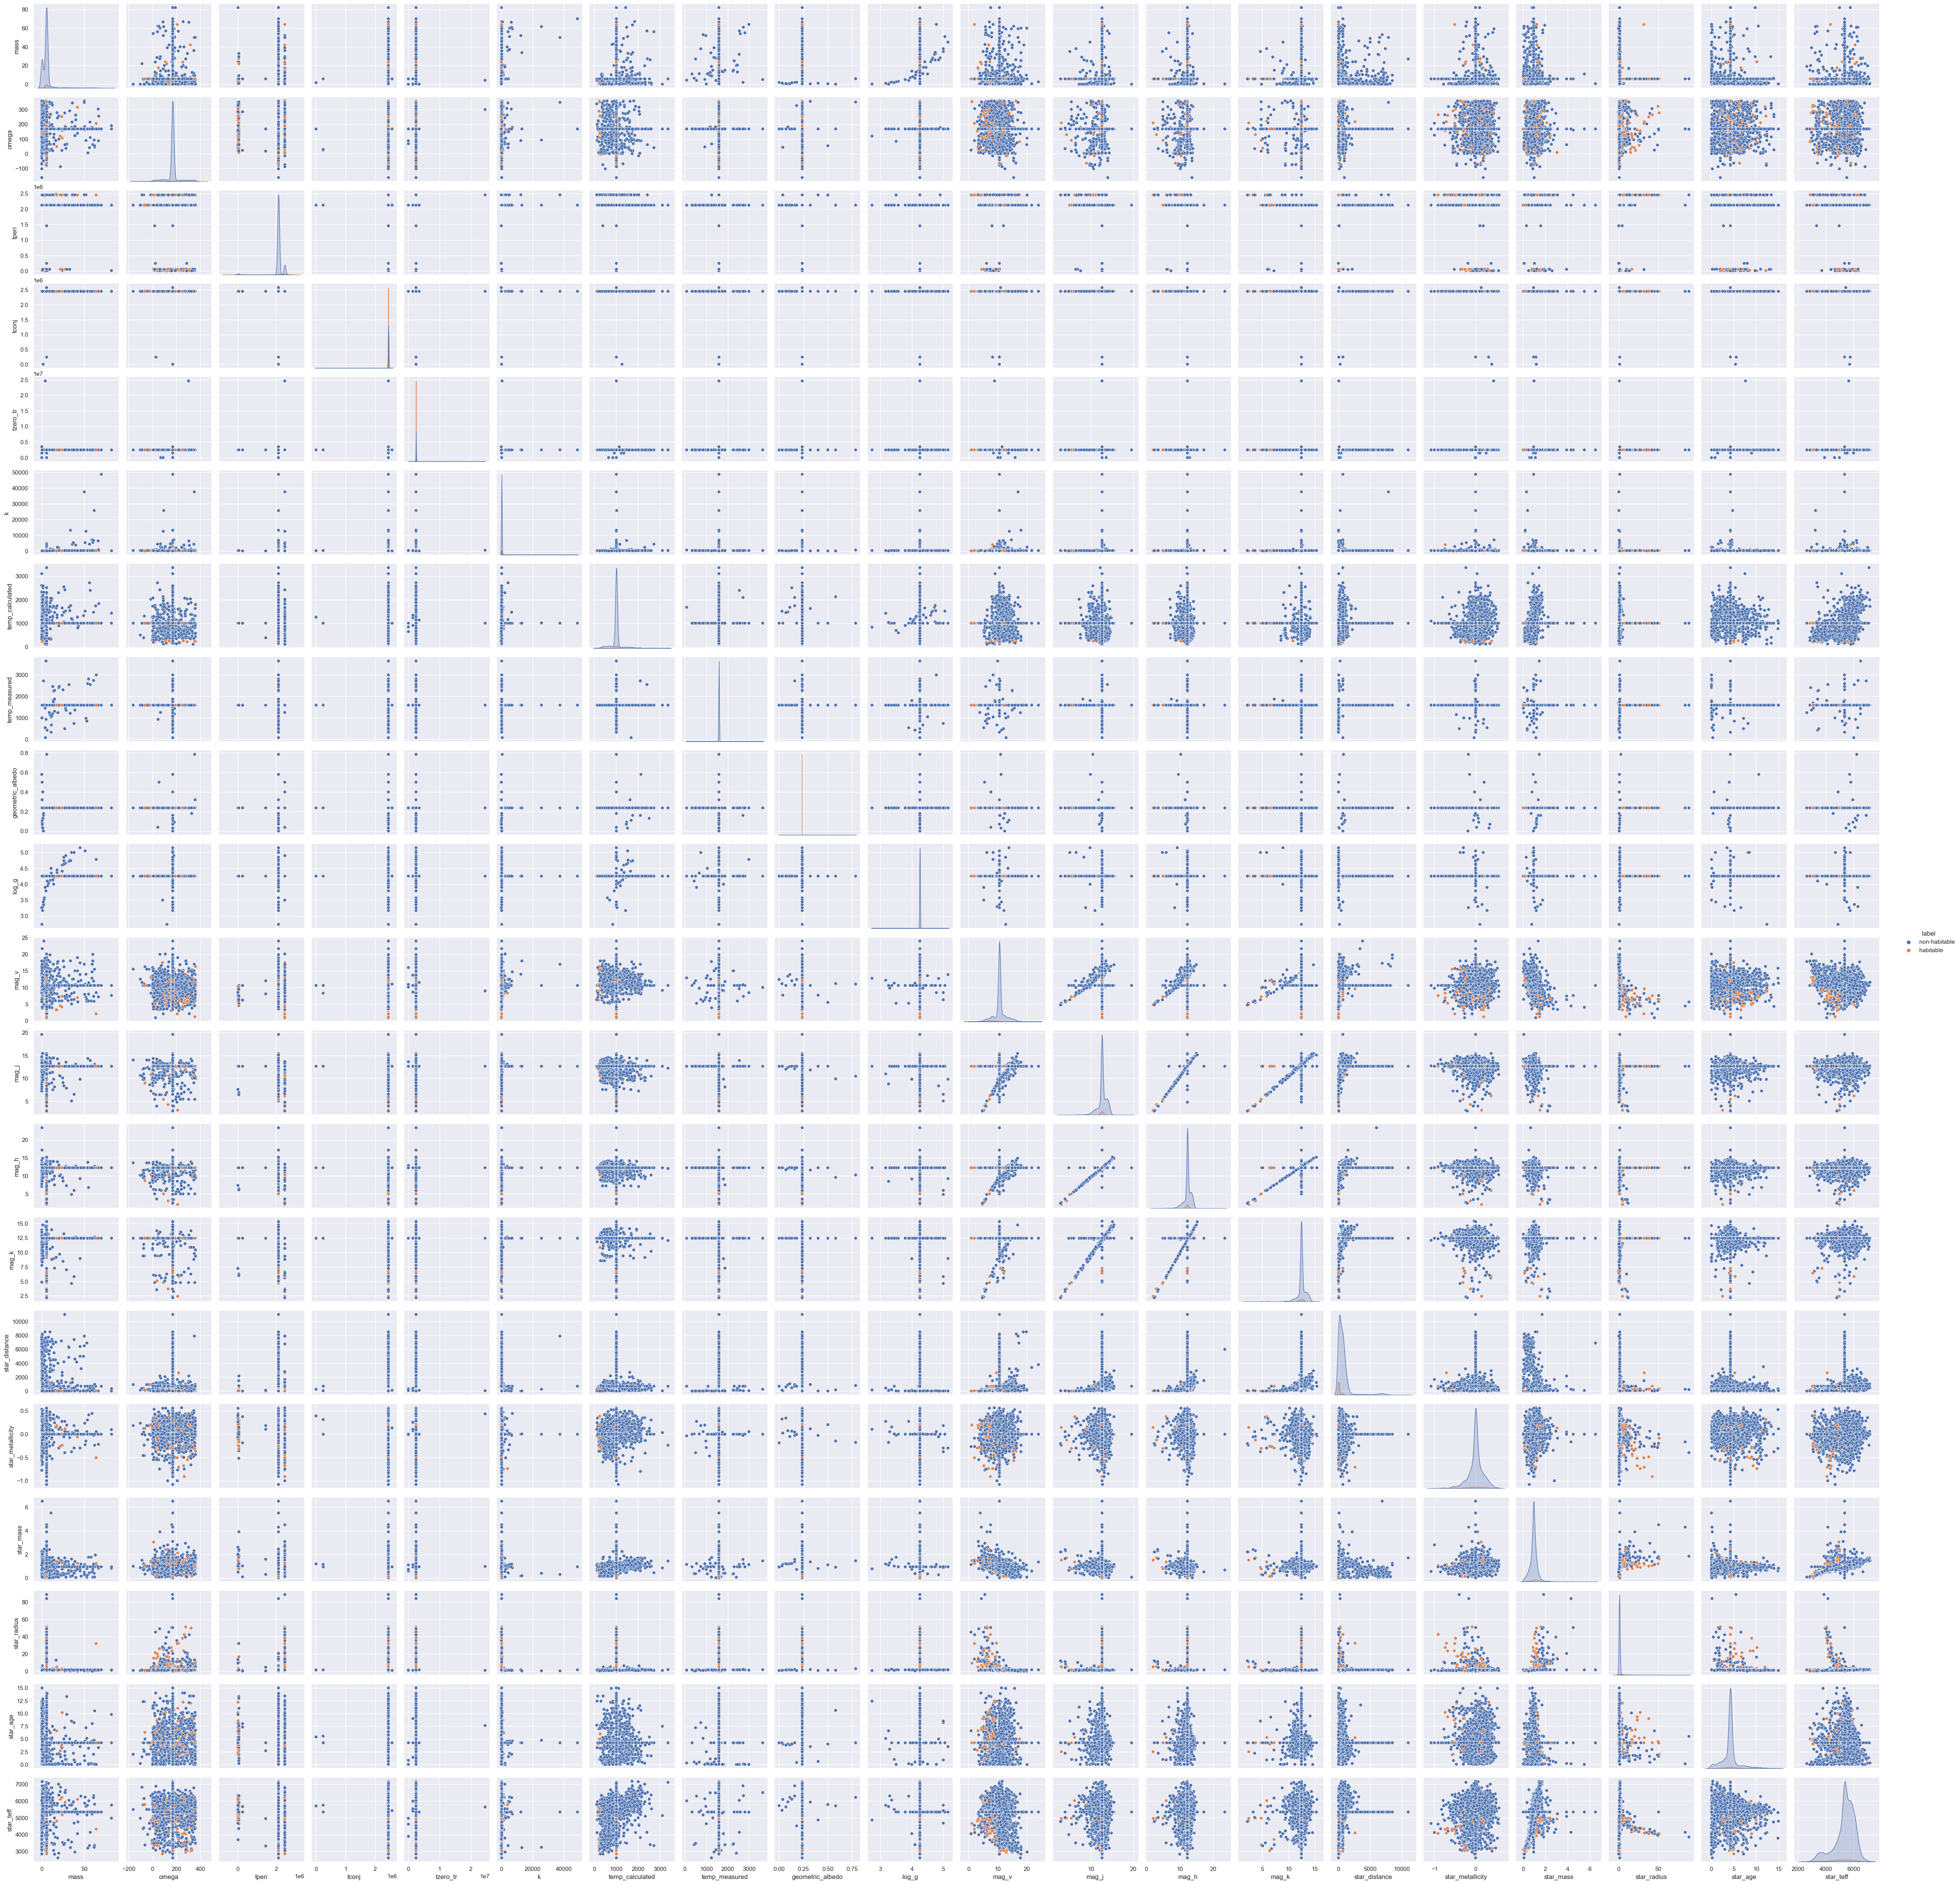

In [4]:
sns.pairplot(data=exop.drop(['label_bin'], axis=1), hue='label')
# there is not a clear difference between components

## Data Pre-Processing

In [6]:
x = exop.drop(['label', 'label_bin'], axis=1)
y = exop['label_bin']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [8]:
x_train_norm = normalize(X=x_train)
x_test_norm = normalize(X=x_test)

In [10]:
scaler = StandardScaler()
x_train_ = scaler.fit_transform(x_train_norm)
x_test_ = scaler.fit_transform(x_test_norm)

## Dimensionality Reduction

### PCA

In [13]:
loss = 100

comp = 5  # number of components

while loss > 10:
    pca = PCA(n_components=comp)
    pca.fit(x_train_)
    pca_features = pca.transform(x_train_)

    loss = (1 - pca.explained_variance_ratio_.sum()) * 100
    print('No. of Components =', comp)
    print('Variance Loss = ', loss)
    comp += 1
    print(' ')

No. of Components = 5
Variance Loss =  45.03103389098837
 
No. of Components = 6
Variance Loss =  39.75268508383054
 
No. of Components = 7
Variance Loss =  34.75930254162486
 
No. of Components = 8
Variance Loss =  29.882624055240182
 
No. of Components = 9
Variance Loss =  25.236236806979985
 
No. of Components = 10
Variance Loss =  21.048909084344558
 
No. of Components = 11
Variance Loss =  17.133420591915737
 
No. of Components = 12
Variance Loss =  13.32086147425795
 
No. of Components = 13
Variance Loss =  9.992782784719022
 


In [14]:
# the optimal number of components is 13
pca_13 = PCA(n_components=13)

x_train_pca = pca_13.fit_transform(x_train_)
x_test_pca = pca_13.transform(x_test_)

#### Plotting

In [5]:
def plot_componenents(x_train, y_train, kind):
    for i in range(3):
        for j in range(3):
            if not j == i:
                # projected coordinates
                fig, ax = plt.subplots(figsize = (5, 4))
                for cat in np.unique(y_train):
                    mask = (cat == y_train)
                    ax.scatter(x_train[mask][:, i], 
                            x_train[mask][:, j], label=cat, 
                            alpha=0.5)

                ax.set_xlabel(x_train + ' ' + str(i))
                ax.set_ylabel(x_train + ' ' + str(j))
                ax.legend();
                plt.show()

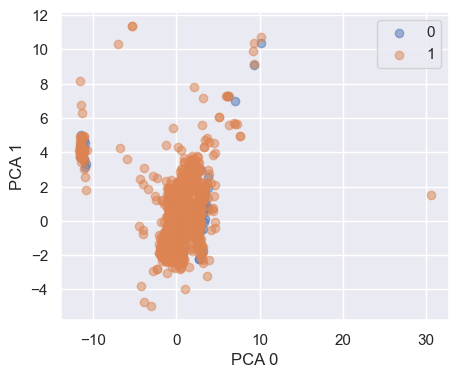

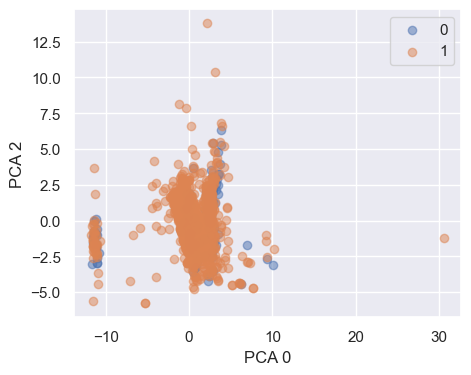

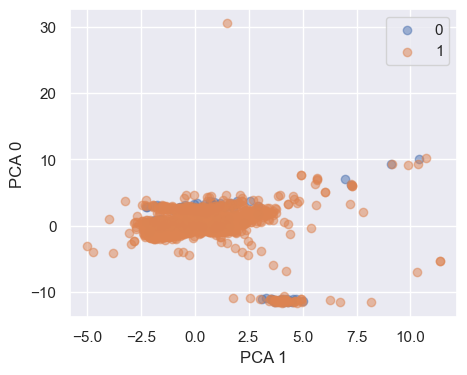

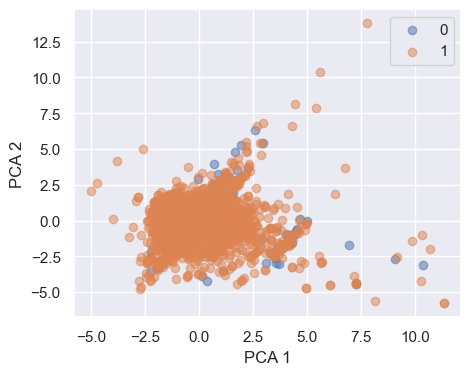

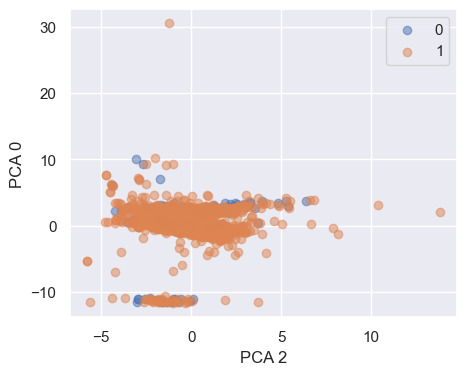

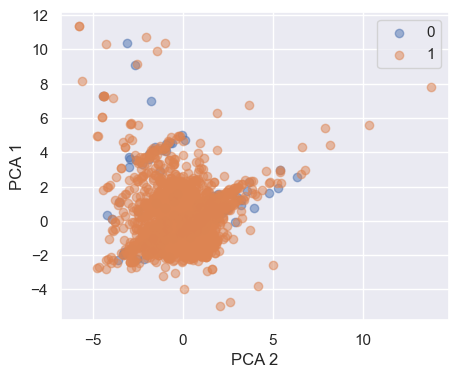

In [23]:
plot_componenents(x_train_pca, y_train, 'PCA')

# there is no obvious difference between both classes

### UMAP

In [18]:
comp = 13
neighbors = 50
min_dist = 0.5

In [19]:
umaper = umap.UMAP(n_neighbors=neighbors, 
                   min_dist=min_dist, 
                   n_components=comp, 
                   random_state=42)

In [20]:
x_train_umap = umaper.fit_transform(x_train_)
x_test_umap = umaper.fit_transform(x_test_)